In [88]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df= pd.read_csv(r'data.csv')

In [186]:
#To describe the merged dataframe df
df.describe()

,maternalage,ageatfirstmarriage,ageatfirstpregnancy,numberofancvisit,gravidity,parity,birthweight,apgarscoreatfiveminutes,hemoglobinlevelonadmissionfordel,numberofpuscellsinurineonadmissi,Residence_COunty,Ethnicity12,AgeFstPregnancy
count,352.000000,292.000000,352.000000,352.000000,352.000000,352.000000,342.000000,345.000000,337.000000,66.000000,352.0,352.000000,352.000000
mean,26.465909,21.777397,21.559659,3.849432,2.053977,1.840909,3036.871345,8.307246,11.905341,10.212121,1.0,2.690341,1.681818
std,5.493221,3.613896,3.551312,1.501205,1.122135,1.028221,597.889255,2.422899,1.473587,6.889267,0.0,1.459078,0.472502
min,17.000000,14.000000,14.000000,0.000000,1.000000,0.000000,960.000000,0.000000,6.400000,2.000000,1.0,1.000000,1.000000
25%,22.000000,19.000000,19.000000,3.000000,1.000000,1.000000,2800.000000,9.000000,11.000000,4.250000,1.0,1.000000,1.000000
50%,25.000000,21.000000,21.000000,4.000000,2.000000,2.000000,3100.000000,9.000000,12.000000,9.000000,1.0,2.500000,2.000000
75%,30.000000,24.000000,24.000000,5.000000,3.000000,2.000000,3400.000000,9.000000,12.800000,12.000000,1.0,4.000000,2.000000
max,42.000000,35.000000,38.000000,12.000000,6.000000,6.000000,4500.000000,10.000000,15.800000,30.000000,1.0,5.000000,3.000000


In [187]:
df.dtypes

id                   object
maternalage           int64
maternaleducation    object
maritalstatus        object
occupation           object
                      ...  
TimeAlcoholuse       object
SpecificTreat1       object
TretaMentPurpose1    object
Ethnicity12           int64
AgeFstPregnancy       int64
Length: 88, dtype: object

In [188]:
#Check for missing values
df.isna().sum()

id                     0
maternalage            0
maternaleducation      0
maritalstatus          0
occupation             0
                    ... 
TimeAlcoholuse       327
SpecificTreat1       332
TretaMentPurpose1    332
Ethnicity12            0
AgeFstPregnancy        0
Length: 88, dtype: int64

In [189]:
df2 = df[['maternalage','maternaleducation', 'ageatfirstpregnancy','parity','diabetespersonalhistory','diabetesfamilyhistory','hypertensionpersonalhistory','hypertensionfamilyhistory','numberofancvisit','timetrimesteroffirstancvisit','multiplicityofpregnancy','gravidity','tobaccouse','alcoholuse','AgeFstPregnancy','countyofresidence','Specific_AreaResid','Disease']]

In [190]:
df2.dtypes

maternalage                      int64
maternaleducation               object
ageatfirstpregnancy              int64
parity                           int64
diabetespersonalhistory         object
diabetesfamilyhistory           object
hypertensionpersonalhistory     object
hypertensionfamilyhistory       object
numberofancvisit                 int64
timetrimesteroffirstancvisit    object
multiplicityofpregnancy         object
gravidity                        int64
tobaccouse                      object
alcoholuse                      object
AgeFstPregnancy                  int64
countyofresidence               object
Specific_AreaResid              object
Disease                         object
dtype: object

In [191]:
df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)
df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)

df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('Yes',1)
df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('No',0)

df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('Yes',1)
df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('No',0)

df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('Yes',1)
df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('No',0)

df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('Yes',1)
df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('No',0)

df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('First trimester',1)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Second trimester ',2)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Third trimester',3)

df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('None',0)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Singleton',1)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Twin',2)

df2['tobaccouse'] = df2['tobaccouse'].replace('Yes',1)
df2['tobaccouse'] = df2['tobaccouse'].replace('No',0)

df2['alcoholuse'] = df2['alcoholuse'].replace('Yes',1)
df2['alcoholuse'] = df2['alcoholuse'].replace('No',0)

df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Rural',0)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Informal settlement',1)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Urban/estate',2)

<ipython-input-191-4949783ded3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)
<ipython-input-191-4949783ded3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)
<ipython-input-191-4949783ded3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [192]:
df2

,maternalage,maternaleducation,ageatfirstpregnancy,parity,diabetespersonalhistory,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,countyofresidence,Specific_AreaResid,Disease
0,24,Tertiary education,24,1,0,0,0,0,4,1,1,1,0,0,2,Nairobi,1,1
1,37,Tertiary education,26,4,0,0,0,1,3,1,1,4,0,0,2,Nairobi,1,1
2,27,Tertiary education,26,1,0,0,0,0,3,2,1,1,1,1,2,Nairobi,2,1
3,30,Tertiary education,27,2,0,1,0,0,3,1,1,2,0,0,2,Nairobi,1,0
4,29,Secondary education,18,3,0,0,0,1,4,1,1,3,0,0,1,Nairobi,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,Tertiary education,29,2,0,0,0,0,3,2,1,2,0,0,2,Nairobi,1,1
348,27,Secondary education,25,2,0,1,0,1,3,2,1,2,0,0,2,Nairobi,1,0
349,27,Primary education,18,2,0,0,0,0,5,2,1,2,0,0,1,Nairobi,1,0
350,26,Secondary education,23,2,0,0,0,0,4,2,1,2,0,0,2,Kajiado,1,0


In [193]:
df2 = df2.drop('countyofresidence',axis=1)
df2 = df2.drop('maternaleducation',axis=1)
df2 = df2.drop('diabetespersonalhistory',axis=1)

In [194]:
df2

,maternalage,ageatfirstpregnancy,parity,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,Specific_AreaResid,Disease
0,24,24,1,0,0,0,4,1,1,1,0,0,2,1,1
1,37,26,4,0,0,1,3,1,1,4,0,0,2,1,1
2,27,26,1,0,0,0,3,2,1,1,1,1,2,2,1
3,30,27,2,1,0,0,3,1,1,2,0,0,2,1,0
4,29,18,3,0,0,1,4,1,1,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,29,2,0,0,0,3,2,1,2,0,0,2,1,1
348,27,25,2,1,0,1,3,2,1,2,0,0,2,1,0
349,27,18,2,0,0,0,5,2,1,2,0,0,1,1,0
350,26,23,2,0,0,0,4,2,1,2,0,0,2,1,0


In [195]:
df2.isna().sum()

maternalage                     0
ageatfirstpregnancy             0
parity                          0
diabetesfamilyhistory           0
hypertensionpersonalhistory     0
hypertensionfamilyhistory       0
numberofancvisit                0
timetrimesteroffirstancvisit    0
multiplicityofpregnancy         0
gravidity                       0
tobaccouse                      0
alcoholuse                      0
AgeFstPregnancy                 0
Specific_AreaResid              0
Disease                         0
dtype: int64

In [196]:
#check for duplicate values
df2.duplicated().sum()

13

In [197]:
#Remove duplicates
df2.drop_duplicates(inplace=True)
df2.shape

(339, 15)

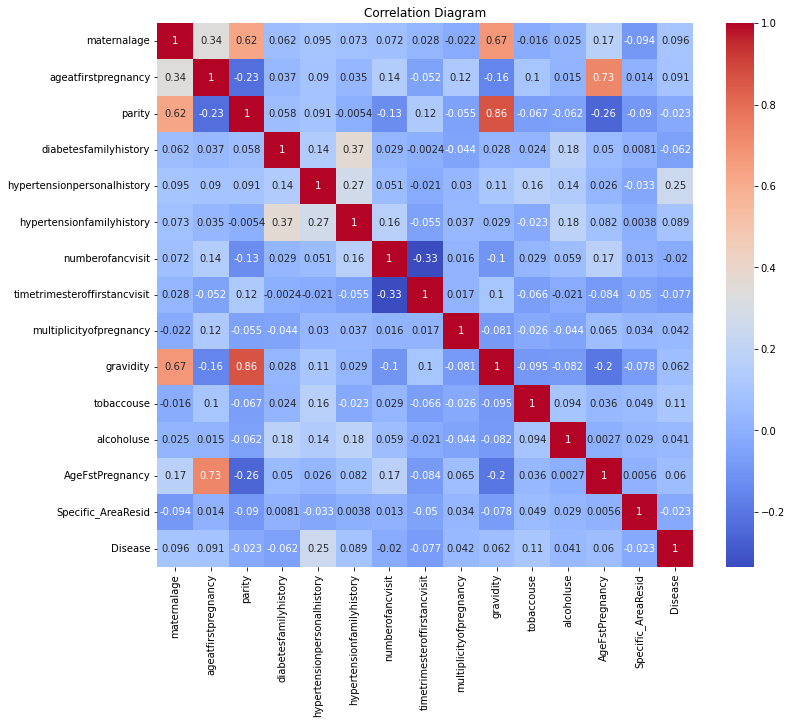

In [198]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Diagram')
plt.show()

In [ ]:
df2.to_csv(r'C:\Users\folop\OneDrive\Desktop\data.csv', index=False)

In [199]:
scaler=StandardScaler()
x = scaler.fit_transform(df2)

In [200]:
# Separate the target variable from the features
X = df2.drop('Disease', axis=1)
y = df2['Disease']

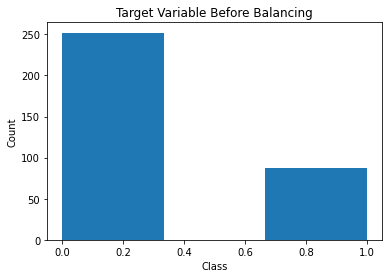

In [201]:
# plot the target variable before balancing
plt.hist(y, bins=3)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

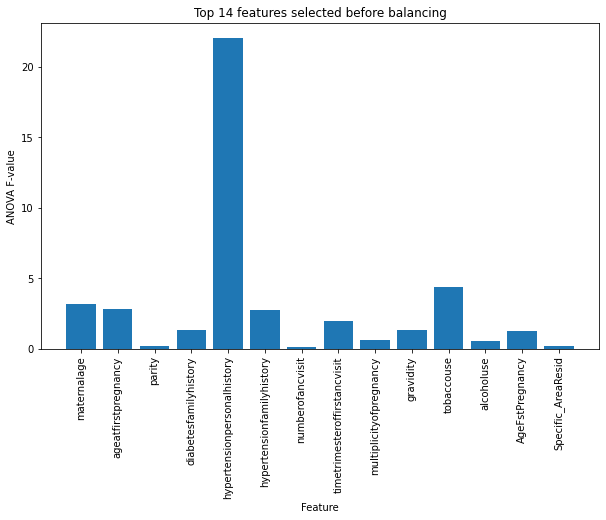

In [202]:
k = 14
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)
X_topk = selector.transform(X)

# Plot selected features before balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xticks(range(len(selector.scores_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected before balancing'.format(k))
plt.show()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6274509803921569


In [217]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       53    19
1       19    11


In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        72
           1       0.37      0.37      0.37        30

    accuracy                           0.63       102
   macro avg       0.55      0.55      0.55       102
weighted avg       0.63      0.63      0.63       102



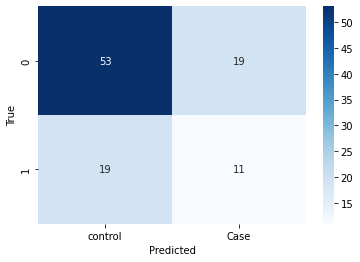

In [219]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

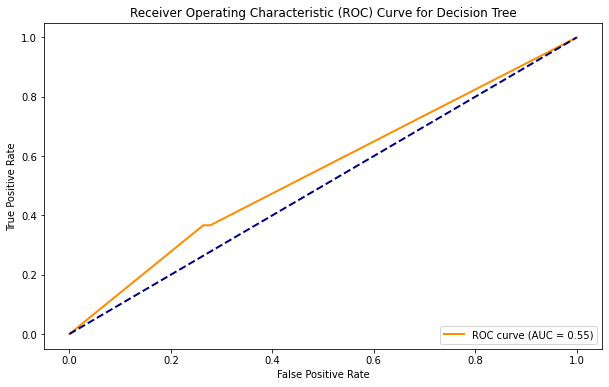

In [220]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 75% training and 25% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.5294117647058824


In [222]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       31    21
1       11     5


In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        52
           1       0.19      0.31      0.24        16

    accuracy                           0.53        68
   macro avg       0.47      0.45      0.45        68
weighted avg       0.61      0.53      0.56        68



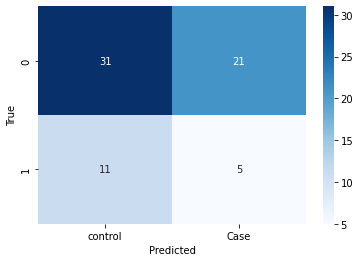

In [224]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

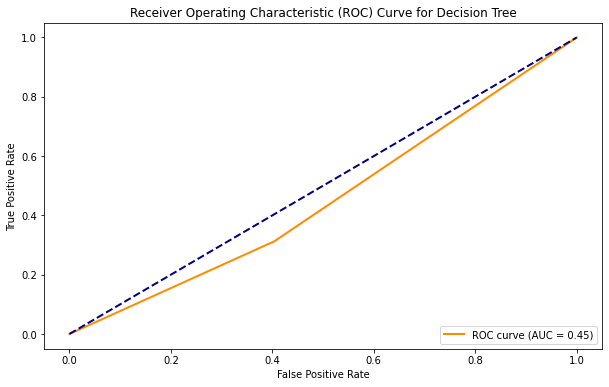

In [225]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 80% training and 20% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6235294117647059


In [234]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       45    20
1       12     8


In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        65
           1       0.29      0.40      0.33        20

    accuracy                           0.62        85
   macro avg       0.54      0.55      0.54        85
weighted avg       0.67      0.62      0.64        85



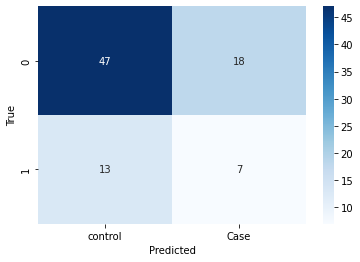

In [162]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

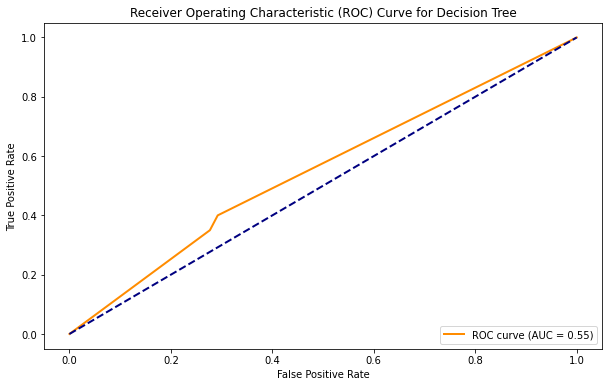

In [163]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [164]:
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 187, 1: 67})
After Counter({1: 96, 0: 64})


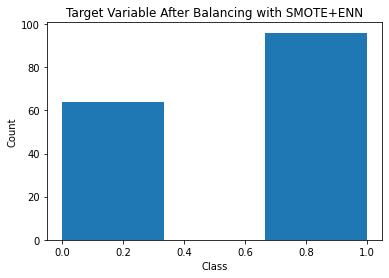

In [165]:
plt.hist(y_resampled, bins=3)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


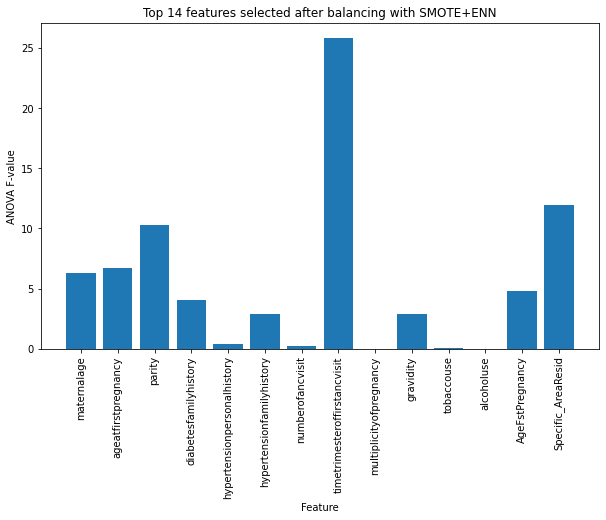

In [166]:
selector_balanced = SelectKBest(f_classif, k=k)
selector_balanced.fit(X_resampled, y_resampled)
X_balanced_topk = selector_balanced.transform(X_resampled)

# Plot selected features after balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector_balanced.scores_)), selector_balanced.scores_)
plt.xticks(range(len(selector_balanced.scores_)), X.columns[selector.get_support()], rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected after balancing with SMOTE+ENN'.format(k))
plt.show()

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1) # 70% training and 30% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.875


In [168]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       15     5
1        1    27


In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.84      0.96      0.90        28

    accuracy                           0.88        48
   macro avg       0.89      0.86      0.87        48
weighted avg       0.88      0.88      0.87        48



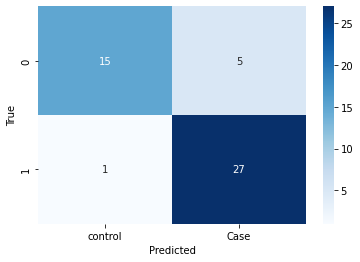

In [170]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

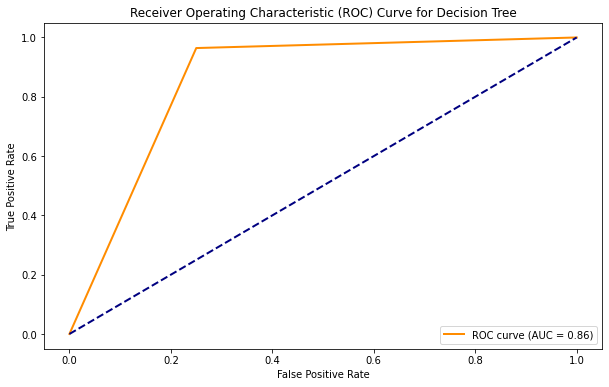

In [171]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=1) # 75% training and 30% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.85


In [173]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       13     5
1        1    21


In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.81      0.95      0.88        22

    accuracy                           0.85        40
   macro avg       0.87      0.84      0.84        40
weighted avg       0.86      0.85      0.85        40



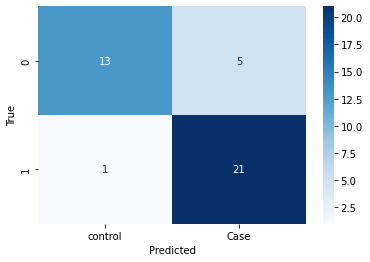

In [175]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

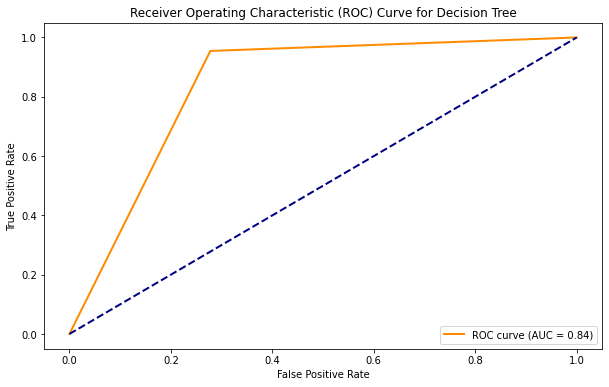

In [176]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1) # 80% training and 30% test
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.84375


In [179]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       10     4
1        1    17


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.81      0.94      0.87        18

    accuracy                           0.84        32
   macro avg       0.86      0.83      0.84        32
weighted avg       0.85      0.84      0.84        32



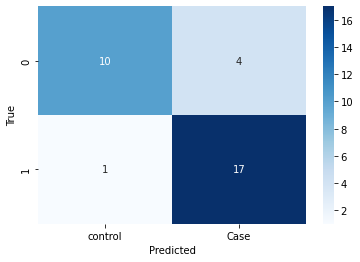

In [181]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

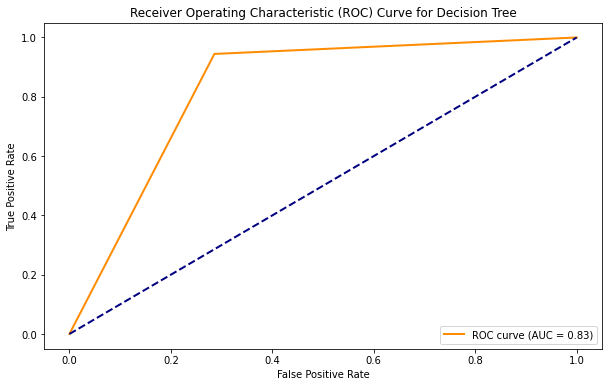

In [182]:
y_prob = dtree.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

[Text(0.5336538461538461, 0.95, 'timetrimesteroffirstancvisit <= 2.5\ngini = 0.476\nsamples = 128\nvalue = [50, 78]'),
 Text(0.4951923076923077, 0.85, 'Specific_AreaResid <= 1.5\ngini = 0.448\nsamples = 118\nvalue = [40, 78]'),
 Text(0.20192307692307693, 0.75, 'ageatfirstpregnancy <= 17.5\ngini = 0.331\nsamples = 67\nvalue = [14, 53]'),
 Text(0.16346153846153846, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2403846153846154, 0.65, 'gravidity <= 1.5\ngini = 0.301\nsamples = 65\nvalue = [12, 53]'),
 Text(0.07692307692307693, 0.55, 'numberofancvisit <= 3.5\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.038461538461538464, 0.45, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.11538461538461539, 0.45, 'maternalage <= 24.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.07692307692307693, 0.35, 'maternalage <= 22.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.038461538461538464, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1153846153846

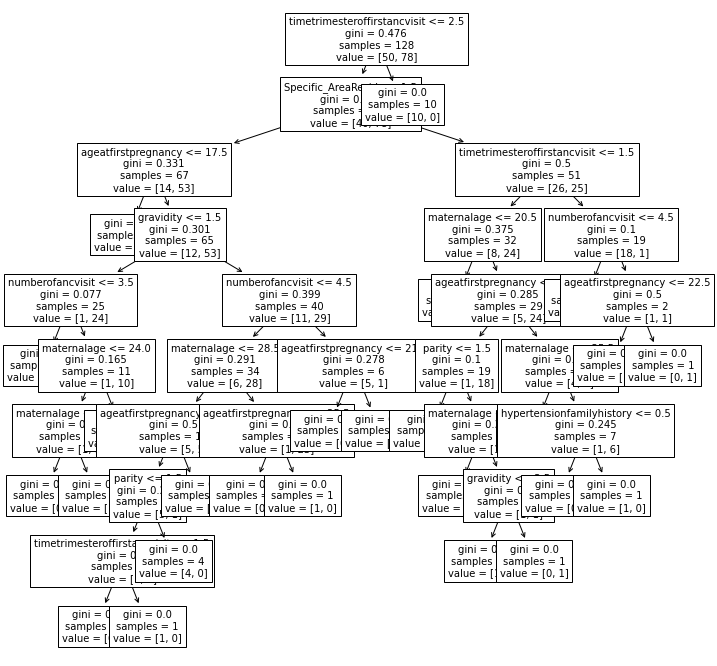

In [52]:
features= ['maternalage','ageatfirstpregnancy','parity','diabetesfamilyhistory','hypertensionpersonalhistory','hypertensionfamilyhistory','numberofancvisit','timetrimesteroffirstancvisit','multiplicityofpregnancy','gravidity','tobaccouse','alcoholuse','AgeFstPregnancy','Specific_AreaResid']

target=['species']
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, feature_names=features,fontsize=10)